<a href="https://colab.research.google.com/github/profunccdata/Knowledge_Discovery_In_Databases/blob/main/EDAIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Exploratory Data Analysis
When approaching a data mining problem, a data mining analyst will have a priori hypothesis (one formed beforehand) that he or she would like to test regarding the relationships between variables. However,analysts do not always have these notions of the expected relationships among variables. When given an unknown large database, analysts often prefer to use **Exploratory Data Analysis(EDA)** or graphical analysis to understand the data.

EDA allows the analyst to:
* Delve into the dataset
* Examine the inter-relationships among the attributes
* Identify the interesting subsets of the observations
* Develop an initial idea of possible associations among the predictors, as well as between the predictors and target variable.

<p>We will be examing the IRIS dataset - this dataset is well known and is in your folder with this notebook.  The first part of the data mining process (CRISP-DM) is domain understanding - the IRIS dataset deals with determination of iris species based on petal and sepal dimensions.  Data preprocessing and EDA for data understanding go together and are often done in a cyclical manner.  Performing Exploratory Data Analysis is part of the process of Data Understanding.</p>

<h3>EDA With the IRIS Dataset</H3>

<h3>You can use Kernel . . . Restart to clear out the output for the code so you can execute each block</h3>


###### Getting to know the DATASET
Graphs,plots and tables often uncover the important relationships that could indicate important areas for further investigation.

###### About the data: 
The Iris flower data is a multivariate data set introduced by the British statistician and 
biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems.The dataset is  plotted onto
different kinds of plots to determine patterns in the data in relation to the Iris classifications.
The data set contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. 
The fifth column is the species of the flower observed. All observed flowers belong to one of three species. Let's start exploring the data!


In [1]:
#Load the Iris dataset
#The data analysis libraries, i.e. NumPy and Pandas are an integral part of Data Visualisation and
#are often required for data preprocessing.

In [1]:
# Import the `pandas` library as `pd`. You have learned about these libraries in your previous work for Data Mining.
import pandas as pd
iris_data = pd.read_csv('Iris.csv') #path may have to be altered

The dataset is loaded.  We now begin exploration.  We will use summarization and visualization by showing Graphs (Histograms,barplots) and summary statistics for the set of variables in the dataset

In [2]:
#Summarize the dataset
# Provides the number of rows and columns in a dataset. There are 5 columns in iris dataset and a total of 150 records.
print(iris_data.shape)

(150, 5)


In [3]:
#Take a peek at the data : Preliminary exploration, print and visualize first and last 5  records in the dataset
# Prints the top 5 rows of the iris dataset
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Prints the bottom 5 rows of the iris dataset
iris_data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#To obtain the information on the attributes of the dataset
# The following command gives metadata of the dataset

print (iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


The data reports on four characteristics of the three species of the Iris Flower, sepal length, sepalwidth, petal length, and petal width. The goal of
a EDA is to perform an initial analysis, given the four measurements, will classify a flower correctly. This is the beginning of creating “predictors” in order to try to make a more educated guess on a record in a dataset.

In [7]:
# To find the statistical summary of the dataset
#Gives the record count, average value,standard deviation,minimum and maximum value, data distribution in each quantile for each 
#column in a database.

print(iris_data.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [8]:
#Check for nulls in the dataset and count for the number of nulls. It could be observed that there
#are no nulls in the dataset.
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

###### Exploring Categorical Variables

One of the primary reasons performing EDA is to investigate the variables, examine distributions of the categorical variables, look at histograms for numeric variables and explore relationships among sets of variables.  

In [9]:
#The categorical variable we are exploring is Species.  There is only one categorical
#variable but typically you want to explore each categorical variable as shown in the meta data.
#We want to see the class distribution (different species and number in each species)
#To view the class distribution of data means to look at the number of instances (rows)
#that belong to each class. We can view this as an absolute count.
#groupby filters the rows in data based on the species.
print(iris_data.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [10]:
#Count Plot displays the number of observations for a categorical variable using bars.
#In the plot below, we are counting the number of observations of each species of Iris Plant, 
#and we can see that each species has 50 samples in the dataset.
#We are going to import seaborn in order to create some great charts
#the next line of code displays a Categorical Variable Plot
import seaborn as sns
sns.countplot(x='Species',data=iris_data, palette="OrRd")

<p>You can learn more about seaborn here:</p>
<p><a href="http://seaborn.pydata.org/introduction.html">Seaborn Introduction</a></p>

In [5]:
# Now we will Load the required libraries for more visualizations
# You can learn more about each library on you ownv
# They are all important for isualizing data graphically
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score

##### Exploring Numeric Variables
Let's turn to explore numeric predictive variables.The Ususal type of histograms do not help determine whether the predictor variables are associated with the target variable. To explore whether a predictor is useful for predicting the target variable,we should use an overlay histogram.

Using a non-normalized histogram gives an insight of frequency distribution of the variable in the dataset.

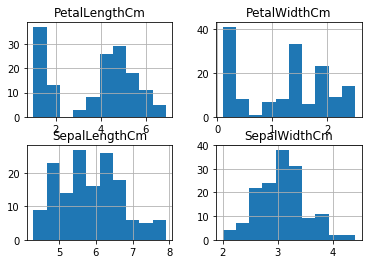

In [12]:
#Before plotting the graphs to visualize we should know the data. 
#We know that our dataset has 4 attributes that describes the flower and classifies to the species it belongs to. 
#The below graphs are a univariate (one variable) form of visualizing the data. 
#The graphs also shows how the data is distributed for every single attribute of the dataset.
#A great way to get started exploring a single variable is with the histogram.

#Plot a histogram of the Iris dataset
iris_data.hist()

#Show the histogram using plt.show()
plt.show()

###### From  the above graphs we could see that the data for each attribute is not normally distrubuted. Say the graph for sepal width is left skewed and we could see some ouliers in the graph for petal length and petal width.

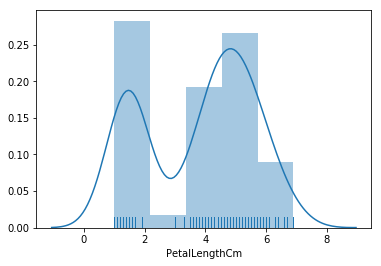

In [13]:
#To make a basic histogram in Python, we can use either matplotlib or seaborn. 
#Density Plots in Seaborn :To make density plots in seaborn, we can use either the distplot or kdeplot function. 
#A benefit of using the distplot function is that it lets us make multiple distributions with one function call.

# univariate plots to see individual distribution
#import seaborn library as sns
#kde=true & hist=true by default

sns.distplot(a=iris_data["PetalLengthCm"],rug=True)

#The curve shows the density plot which is essentially a smooth version of the histogram. 
#The y-axis is in terms of density, and the histogram is normalized by default so that it has the 
#same y-scale as the density plot.

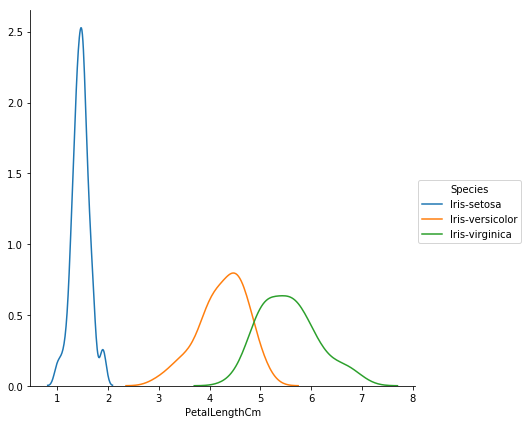

In [14]:
## A seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature.
#The FacetGrid:
#The core seaborn utility for faceting is the FacetGrid. 
#A FacetGrid is an object which stores some information on how you want to break up your data visualization.
#Look at the amazing visualization below!

sns.FacetGrid(iris_data, hue="Species", size=6) \
    .map(sns.kdeplot, "PetalLengthCm") \
    .add_legend()

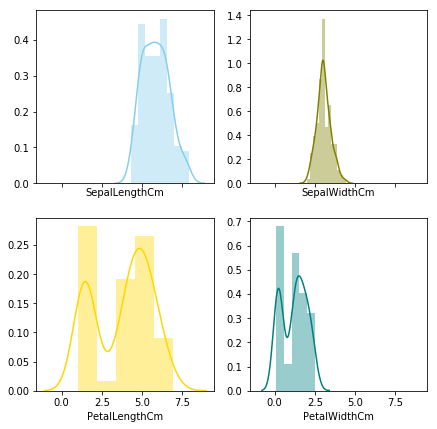

In [15]:
#The following graphs show the univariate distribution of an observation.
import seaborn as sns
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( iris_data["SepalLengthCm"] , color="skyblue", ax=axes[0, 0])
sns.distplot( iris_data["SepalWidthCm"] , color="olive", ax=axes[0, 1])
sns.distplot( iris_data["PetalLengthCm"] , color="gold", ax=axes[1, 0])
sns.distplot( iris_data["PetalWidthCm"] , color="teal", ax=axes[1, 1])

From the above graph we could see the distribution of data in SepalLrength and SepalWidth attributes. We could see differences in distribution.Mean and standard deviation for both the coulmns are calculated in previous steps.Thus, as the mean increases the distribution of data becomes elongated in middle portion of the graph.

###### Let's now examine the possible multivariate associations of numeric variables using scatter plots. Multivariate graphs can unearth new interaction effects among the variables which our univariate exploration might have missed.

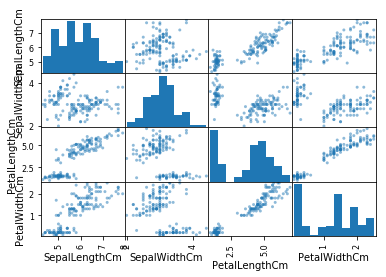

In [16]:
# scatter plot matrix 
scatter_matrix(iris_data)
plt.show()
# The diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

##### Box plots are used to show overall patterns of response for a group. They provide a useful way to visualise the range and other characteristics of responses for a large group.

Median
The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.

Inter-quartile range
The middle “box” represents the middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range.

Upper quartile
Seventy-five percent of the scores fall below the upper quartile.

Lower quartile
Twenty-five percent of scores fall below the lower quartile.

Whiskers
The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.

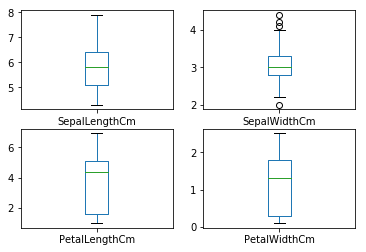

In [17]:
# Box and Whisker plots shows how the data is distributed for each attribute and 
#helps in analysing the summary of statistics graphically. Mean, median, outliers etc.
# Center of the boxplot is the median,any point outsie of the whiskers are treated as individual points known as OUTLIERS
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

###### We can see that the dataset is noisy: The data for Sepalwidth has outliers. The detailed explanation can be found at :https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

Text(0.5,1,'Setosa Sepal Width Q-Q Plot')

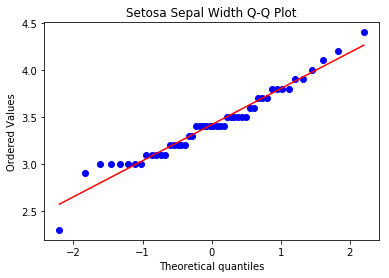

In [18]:
#It’s easier to get a sense of normality visualizing the data as q-q plot. 
#If you are unfamiliar with reading a q-q plot, the data should be on the red line for normally distributed data. 
#If there are data points that are far off of the red line, this is an indication that there are some deviations
#from normality.
# Here is the qq plot to view the normal distribution of data for setosa species based on their petal length
#if the data is not normally distributed, we may need to apply a transformation to achieve normaiity for
#certain models that we may want to apply.  

from scipy import stats
import matplotlib.pyplot as plt

iris_setosa = iris_data.query('Species== "Iris-setosa"')
stats.probplot(iris_setosa['SepalWidthCm'], dist="norm", plot= plt)
plt.title("Setosa Sepal Width Q-Q Plot")



Text(0.5,1,'Versicolor Petal Width Q-Q Plot')

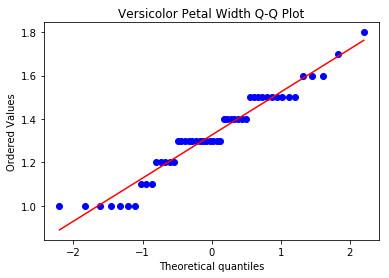

In [19]:
# qq plot to view the normal distribution of data for versicolor species based on their petal width
iris_versi = iris_data.query('Species== "Iris-versicolor"')
stats.probplot(iris_versi['PetalWidthCm'], dist="norm", plot= plt)
plt.title("Versicolor Petal Width Q-Q Plot")

Species
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: PetalLengthCm, dtype: object

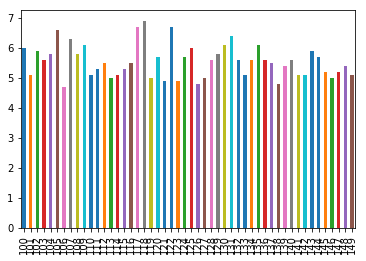

In [20]:
#Barplots can be useful in exploring the data
iris_petal = iris_data.groupby("Species")['PetalLengthCm']
iris_petal.plot.bar(stacked=True)

Species
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: SepalLengthCm, dtype: object

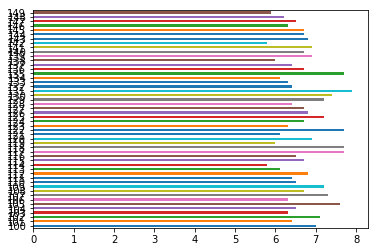

In [21]:
#Horizontal Barplots
iris_petal = iris_data.groupby("Species")['SepalLengthCm']
iris_petal.plot.barh(stacked=False)

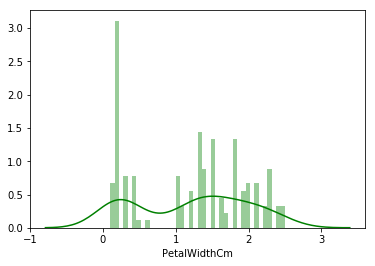

In [22]:
#Dist Plot, also known as Histogram is used to plot a univariate distribution of observation. 
#In the plot below, we are plotting a histogram of the petal_width.
sns.distplot(a=iris_data['PetalWidthCm'], bins=40, color='G')

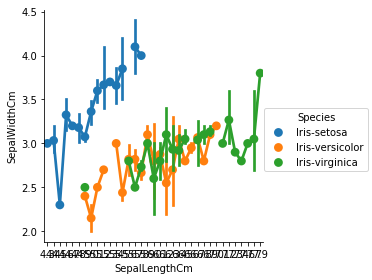

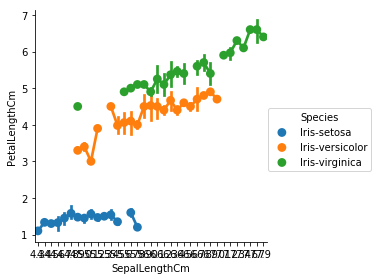

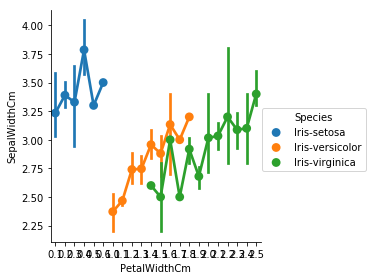

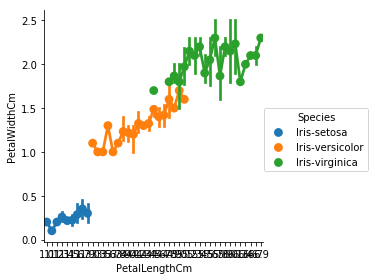

In [23]:
#lets continue to analyze the distribution of species graphically. 
#i.e Plotting categorical variables and exploring them.
# The below plots gives you an insight of characteristics of different species in combination with all "Species". 
#It could be seen that 
# in plot1 the sepal length and sepal width of versicolor and virginica species show an overlap, 
# this seems they share nearly same characteristics.
#in plot2, the sepal and petal length plot depicts unique characteristics for each species. 
#We continue to experiment with different combinations
sns.factorplot(x="SepalLengthCm",y="SepalWidthCm",data=iris_data,hue="Species")
sns.factorplot(x="SepalLengthCm",y="PetalLengthCm",data=iris_data,hue="Species")
sns.factorplot(x="PetalWidthCm",y="SepalWidthCm",data=iris_data,hue="Species")
sns.factorplot(x="PetalLengthCm",y="PetalWidthCm",data=iris_data,hue="Species")

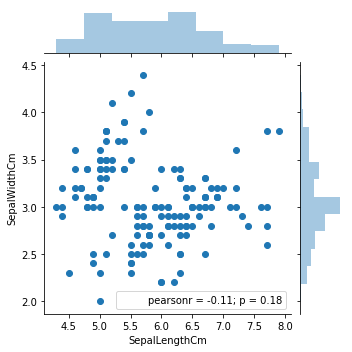

In [24]:
#A joint plot is used to draw a plot of two variables with bivariate and univariate graphs.
#Allows you to view the joint distribution of data and also marginal distribution
## A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same graph
#scatter is default parameter for kind
#Generally Good for data with at least two categorical variables.

sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris_data,size=5,kind="scatter")


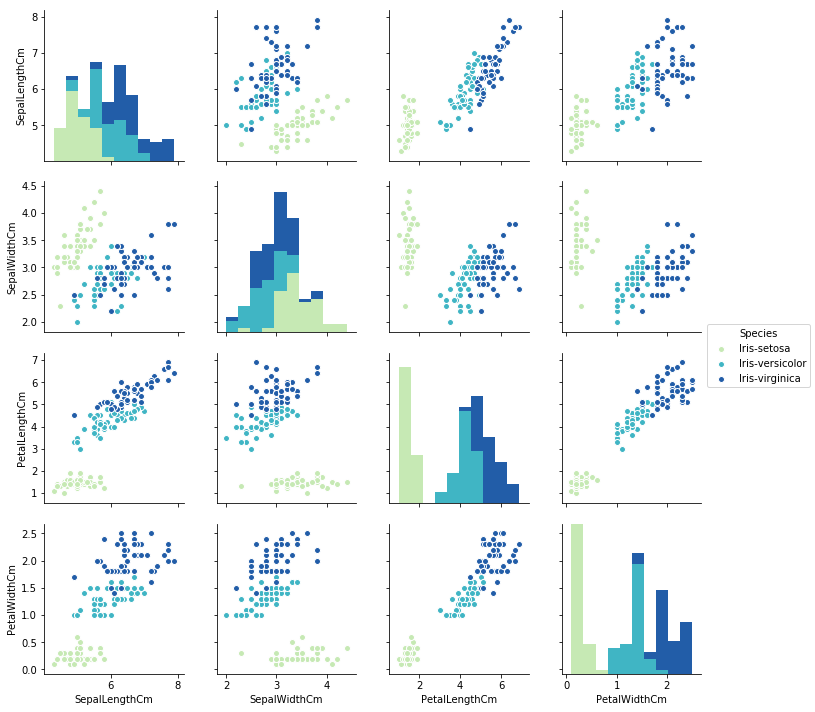

In [25]:
#Pairplot : Pair Plot is used to view the pairwise relationship between all the variables in a dataset and the diagonal axes show the univariate distribution of the variable.
#Pairplot displays distribution of data according to every combination.
# In pair plot, members except diagonals are joint plot
#Good for exploring most kinds of data.

sns.pairplot(iris_data,hue="Species",palette="YlGnBu")
#With the single line of code used below, we can visualize the relationships between all the different variables in the dataset.

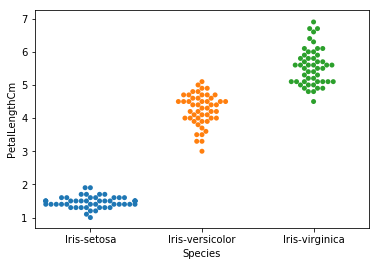

In [26]:
#Bee Swarm plot
#To make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. 
#A data frame containing the data is in your namespace as df.
#Inspect the DataFrame df using df.head(). This will let you identify which column names you need to pass as the x and y keyword arguments in your call to sns.swarmplot().

# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Species', y='PetalLengthCm', data=iris_data)

# Label the axes
_ = plt.xlabel('Species')
_ = plt.ylabel('PetalLengthCm')

# Show the plot
plt.show()

#Interpretation of the above plot : Iris-virginica petals tend to be the longest, and Iris-setosa petals tend to be the shortest of the three species.

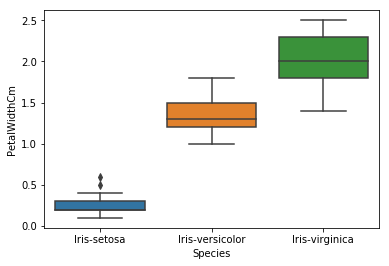

In [27]:
#Boxplot
#A box plot shows the distribution of quantitative data across a categorical variable.

#The set-up is exactly the same as for the bee swarm plot; you just call sns.boxplot() with the same keyword arguments as you would sns.swarmplot(). The x-axis is 'species' and y-axis is 'Petallengthcm'.

#Center of the boxplot is the median 

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='Species', y='PetalWidthCm', data=iris_data)

# Label the axes
_ = plt.xlabel('Species')
_ = plt.ylabel('PetalWidthCm')

# Show the plot
plt.show()


#In the plot below, the quantitative data that we have used is the petal_width, and we are comparing it to the categorical variable species.

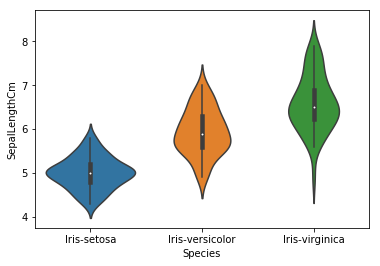

In [28]:
# Violin Plot for Petal Length (most distinguishing feature)
#A violin plot is a variation of box plot. It shows the distribution of quantitative data across several levels of categorical variables. The violin plot also features a kde of the underlying distribution.

sns.violinplot(x="Species", y="SepalLengthCm", data=iris_data)

#In the plot above, the sepal_length is compared against species.

In [29]:
#Let us jump to the quantitative EDA of the dataset.
#Mean is the average and reasonable summary of the data calculated by np.mean()
#Median: Summary statistic that is immune to extreme data, it is the middle value.
np.mean(iris_data)
#Are the mean values affected by outliers?

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

In [30]:
# calculate the mean of species and individual attributes of the column species.
iris_data.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [31]:
#Computing Percentiles

##Create percentiles, a NumPy array of percentiles you want to compute. These are the 2.5th, 25th, 50th, 75th, and 97.5th. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using np.array(). For example, np.array([30, 50]) would create an array consisting of the 30th and 50th percentiles.
##Use np.percentile() to compute the percentiles of the petal lengths from the Iris samples.

# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles
ptiles = np.percentile(iris_data.PetalLengthCm, percentiles)

# Print the result
print(ptiles)

[1.2725 1.6    4.35   5.1    6.455 ]


In [32]:
#The standard deviation and the variance
# variance tells the spread of data

#The standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using np.std() and comparing it to what you get by computing the variance with np.var() and then computing the square root.

#Compute the variance of the data in the  using np.var().
#Print the square root of this value.
#Compute the standard deviation of the data for PetallengthCm array using np.std() and print the result.

# Compute the variance: variance
variance = np.var(iris_data.PetalLengthCm)
print(variance)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
std = np.std(iris_data.PetalLengthCm)
print(std)

3.0924248888888854
1.7585291834055201
1.7585291834055201


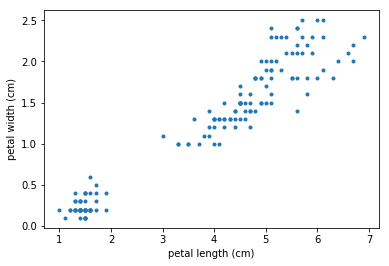

In [33]:
#Scatter Plots and Co variance

#what if you want to compare two properties of a single species? This is exactly what we will do now. 
#We will make a scatter plot of the petal length and width measurements of Iris dataset flowers. 
#If the flower scales (that is, it preserves its proportion as it grows), 
#we would expect the length and width to be correlated.

#We use plt.plot() with the appropriate keyword arguments to make a scatter plot of  
#petal length (x-axis) versus petal width (y-axis). Do not forget to use the marker='.' 
#and linestyle='none' keyword arguments.

# Make a scatter plot
_ = plt.plot(iris_data.PetalLengthCm, iris_data.PetalWidthCm, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

#Observation: It can be observed from the below graph that petal length and petal width are positively corelated. 
#An increase in petal length can have asignificant increase in petal width and hence they are positively corelated.

In [34]:
#Computing the covariance

#Covarience tells how two quantities vary together,it is the mean of the product of the these differences.

## The covariance may be computed using the Numpy function np.cov()
#Here we use np.cov() to compute the covariance matrix for the petal length and width.

#we extract the covariance from entry [0,1] of the covariance matrix. 
#Note that by symmetry, entry [1,0] is the same as entry [0,1].

# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(iris_data.PetalLengthCm, iris_data.PetalWidthCm)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[3.11317942 1.29638747]
 [1.29638747 0.58241432]]
1.2963874720357944


In [35]:
#Pearson correlation coefficient

#The Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. 
#It is computed using the np.corrcoef() function. Like np.cov(), 
#it takes two arrays as arguments and returns a 2D array. 
#Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?)
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [36]:
#Computing correlation co-efficient for specific variables in the dataset.

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two variables."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for PetalWidthCm,PetalLengthCm
r = pearson_r(iris_data.PetalWidthCm, iris_data.PetalLengthCm)

# Print the result
print(r)

0.9627570970509663


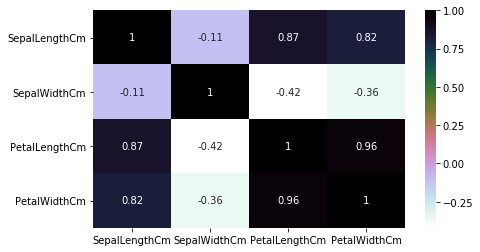

In [37]:
#Generate a heatmap for the correlation matrix
#A Heat Map is a graphical representation of the correlation between all the numerical variables in a dataset. The input provided is a correlation matrix generated using pandas.

plt.figure(figsize=(7,4))
sns.heatmap(iris_data.corr(),annot=True,cmap='cubehelix_r')#draws heatmap with input as the correlation matrix calculated by (iris_data.corr())
plt.show()

#Observation :The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

In [38]:
#Subset of the data and two sample t test for Species

#t test will be on Petal.Length
#Ho or null will be means are equal
#Ha or alternate will be means not equal
iris_data.groupby("Species")['PetalLengthCm'].describe()
iris_versi = iris_data.query('Species== "Iris-versicolor"')
iris_setosa = iris_data.query('Species== "Iris-setosa"')
iris_versi_petal = iris_versi.PetalLengthCm
iris_setosa_petal = iris_setosa.PetalLengthCm
print(np.mean(iris_versi_petal))
print(np.mean(iris_setosa_petal))
stats.ttest_ind(iris_versi_petal,iris_setosa_petal)

4.26
1.464


Ttest_indResult(statistic=39.46866259397272, pvalue=5.717463758170621e-62)

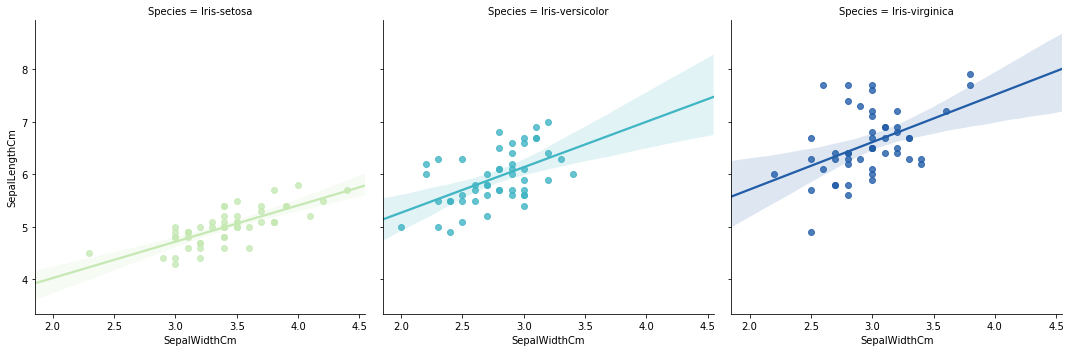

In [39]:
#LM plots are intended as a convenient interface to fit regression models 
#(regression line) across conditional subsets of a dataset.
#In the graph below, we have plotted sepal_width vs. sepal_length. 
#The data set is divided into three subsets based on their species, and regression lines are mapped for each of them.
sns.lmplot(x = 'SepalWidthCm', y = 'SepalLengthCm', data = iris_data, col = 'Species', hue = 'Species', palette = 'YlGnBu')

<p>We have finished exploring the data!  This is a good template to use for exploring other datasets</p>
<p>There are so many examples provided in this notebook and you can drop in a new datafile and modify the commands to explore other datasets</p>
<p> Now you will want to take a quick break and then open the homework notebook!  The homework notebook will give you a change to explore another dataset.  Data exploration and preprocessing is an important part of the preparation of data for modeling</p>
<p>We now know a great deal aboout our data!</p> 
<h1>File . . . download as . . . html --- will save your work as an html file</h1>